In [1]:
import pandas as pd
import joblib

# Load test data
X_test = pd.read_pickle('D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\preprocessed\X_test.pkl')
y_test = pd.read_pickle('D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\preprocessed\y_test.pkl')

# Load your trained Decision Tree model
model = joblib.load('D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\models\decision_tree_model.pkl')


In [11]:
# Predict class labels
y_pred = model.predict(X_test)

# Predict probabilities (optional, useful for ROC/AUC or risk score)
y_proba = model.predict_proba(X_test)[:, 1]


In [4]:
# Combine actual and predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Display first 15 comparisons
comparison_df.head(15)


,Actual,Predicted
0,0,0
1,1,1
2,0,1
3,1,1
4,1,1
5,1,0
6,0,0
7,1,1
8,1,1
9,1,1


In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8800959232613909
Precision: 0.9388888888888889
Recall: 0.8125
F1 Score: 0.8711340206185567

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       209
           1       0.94      0.81      0.87       208

    accuracy                           0.88       417
   macro avg       0.89      0.88      0.88       417
weighted avg       0.89      0.88      0.88       417



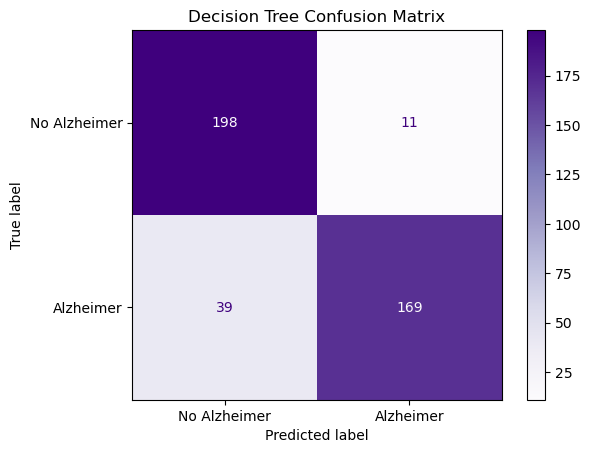

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Alzheimer', 'Alzheimer'])
disp.plot(cmap='Purples', values_format='d')
plt.title('Decision Tree Confusion Matrix')
plt.show()


In [13]:
prob_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Prediction_Probability': y_proba
})

prob_df.head(10)


,Actual,Predicted,Prediction_Probability
0,0,0,0.000000
1,1,1,0.995294
2,0,1,1.000000
3,1,1,0.946429
4,1,1,1.000000
5,1,0,0.213270
6,0,0,0.096154
7,1,1,0.964286
8,1,1,0.995294
9,1,1,0.995294


In [14]:
import os
#model_path = r"D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\models"
#results_path = r"D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\model_results"

# Create the evaluation folder if it doesn’t exist
os.makedirs('D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\evaluation', exist_ok=True)

# Save the comparison DataFrame
comparison_df.to_csv('D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\evaluation\decision_tree_predictions.csv', index=False)

print("Saved comparison results to: outputs/evaluation/decision_tree_predictions.csv")


Saved comparison results to: outputs/evaluation/decision_tree_predictions.csv


In [15]:
from sklearn.metrics import roc_auc_score

# Calculate all key metrics
metrics_summary = {
    'Model': ['Decision Tree'],
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, y_pred)],
    'Recall': [recall_score(y_test, y_pred)],
    'F1_Score': [f1_score(y_test, y_pred)],
    'ROC_AUC': [roc_auc_score(y_test, y_proba)]
}

metrics_df = pd.DataFrame(metrics_summary)

# Save metrics summary
metrics_df.to_csv('D:\Big Data Alzheimer Prediction Project\Alzheimer-Prediction-System\outputs\evaluation\decision_tree_metrics_summary.csv', index=False)

print("Saved evaluation metrics to: outputs/evaluation/decision_tree_metrics_summary.csv")
metrics_df


Saved evaluation metrics to: outputs/evaluation/decision_tree_metrics_summary.csv


,Model,Accuracy,Precision,Recall,F1_Score,ROC_AUC
0,Decision Tree,0.880096,0.938889,0.8125,0.871134,0.911943
